In [8]:
import torch
import torch.nn.functional as F

x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[0], [0], [1]], dtype=torch.float)

class LogisticRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)

    def forward(self, x):
        y_pred = F.sigmoid(self.linear(x))
        return y_pred

model = LogisticRegressionModel()

# binary cross-entropy loss
# 二分类交叉熵损失
criterion = torch.nn.BCELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(100):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    print('Epoch: {}, Loss: {}'.format(epoch, loss.item()))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print('Predict (after training):')
print(model(x_data).data)

Epoch: 0, Loss: 1.8524795770645142
Epoch: 1, Loss: 1.841335654258728
Epoch: 2, Loss: 1.830904245376587
Epoch: 3, Loss: 1.8211381435394287
Epoch: 4, Loss: 1.8119925260543823
Epoch: 5, Loss: 1.8034244775772095
Epoch: 6, Loss: 1.7953944206237793
Epoch: 7, Loss: 1.7878644466400146
Epoch: 8, Loss: 1.780799150466919
Epoch: 9, Loss: 1.7741649150848389
Epoch: 10, Loss: 1.7679312229156494
Epoch: 11, Loss: 1.762068271636963
Epoch: 12, Loss: 1.75654935836792
Epoch: 13, Loss: 1.7513487339019775
Epoch: 14, Loss: 1.7464430332183838
Epoch: 15, Loss: 1.7418099641799927
Epoch: 16, Loss: 1.7374292612075806
Epoch: 17, Loss: 1.7332819700241089
Epoch: 18, Loss: 1.729350209236145
Epoch: 19, Loss: 1.7256176471710205
Epoch: 20, Loss: 1.722069263458252
Epoch: 21, Loss: 1.7186906337738037
Epoch: 22, Loss: 1.715469241142273
Epoch: 23, Loss: 1.712392807006836
Epoch: 24, Loss: 1.7094500064849854
Epoch: 25, Loss: 1.7066307067871094
Epoch: 26, Loss: 1.703925609588623
Epoch: 27, Loss: 1.7013256549835205
Epoch: 28, Lo

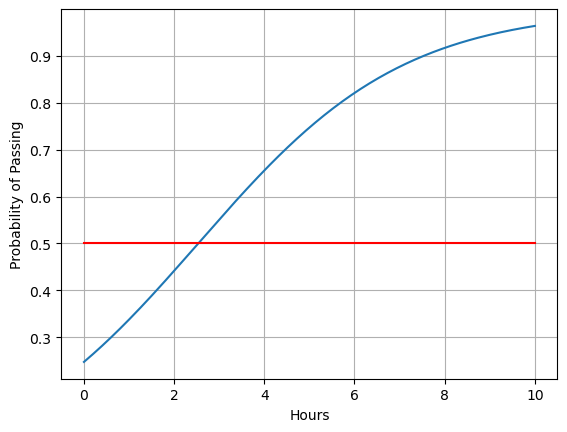

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 200)
x_t = torch.Tensor(x).view(200, 1)
y_t = model(x_t)
y = y_t.data.numpy()

plt.plot(x, y)
plt.plot([0, 10], [0.5, 0.5], c='r')
plt.xlabel('Hours')
plt.ylabel('Probability of Passing')
plt.grid()
plt.show()